## Holographic phase mask generator


Generates a phase mask from an input image, using the Inverse Fourier Transform Algorithm, based on the Gerchberg-Saxton Algorithm to iterate the phase mask output according to an input intensity.

The produced phase mask may be used as a lithography mask, to be etched, for transmissive or reflective diffractive optical elements fabrication.


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:

from matplotlib import pyplot as plt 
import numpy as np 

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

import pyMOE as moe
from scipy.constants import micro, nano, milli

from PIL import Image

ModuleNotFoundError: No module named 'pyMOE'

# Loading target image

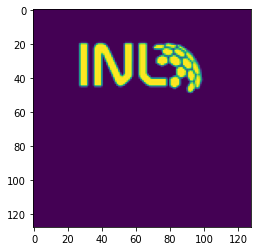

In [11]:
file = "target.png"

target = Image.open(file).convert("L")

size = 128
target = target.resize((size,size))
target = np.array(target)/255

plt.imshow(target)

## Calculating hologram phase mask using Gerchberg Saxton Algorithm

### Using binary phase mask

Progress: [####################] 100.0%
[Gerchberg Saxton Algorithm]
Elapsed: 0:00:00.502003


Text(0.5, 1.0, 'Calculated far field intensity')

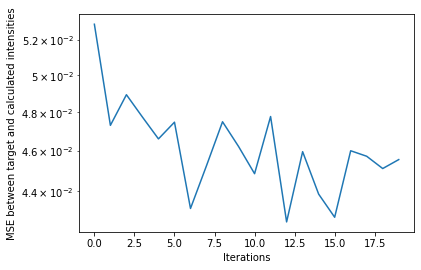

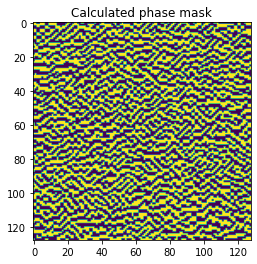

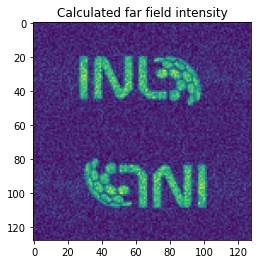

In [12]:
# Binary level phase mask
levels = 2

iterations = 20

levels = moe.utils.create_levels(-np.pi, np.pi, levels,)
phase_mask, errors = moe.holograms.algorithm_Gerchberg_Saxton(target, iterations=iterations, levels=levels)


plt.figure()
plt.semilogy(range(iterations), errors)
plt.xlabel("Iterations")
plt.ylabel("MSE between target and calculated intensities")

plt.figure()
plt.imshow(phase_mask)
plt.title("Calculated phase mask")

far_field = moe.holograms.calculate_phase_farfield(phase_mask)

plt.figure()
plt.imshow(far_field)
plt.title("Calculated far field intensity")


### Using multilevel phase mask

Progress: [####################] 100.0%
[Gerchberg Saxton Algorithm]
Elapsed: 0:00:00.526532


Text(0.5, 1.0, 'Calculated far field intensity')

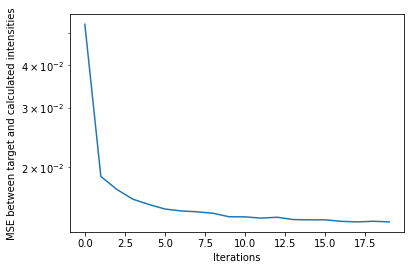

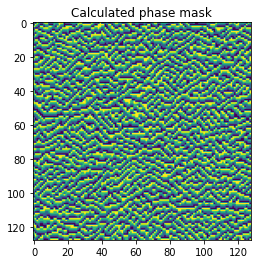

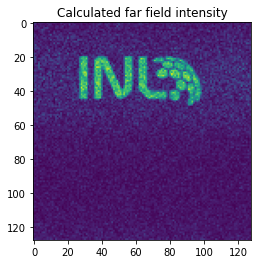

In [13]:
#### Multi level phase mask
levels = 4

iterations = 20

levels = moe.utils.create_levels(-np.pi, np.pi, levels,)
phase_mask, errors = moe.holograms.algorithm_Gerchberg_Saxton(target, iterations=iterations, levels=levels)


plt.figure()
plt.semilogy(range(iterations), errors)
plt.xlabel("Iterations")
plt.ylabel("MSE between target and calculated intensities")

plt.figure()
plt.imshow(phase_mask)
plt.title("Calculated phase mask")

far_field = moe.holograms.calculate_phase_farfield(phase_mask)

plt.figure()
plt.imshow(far_field)
plt.title("Calculated far field intensity")


# Creating aperture from calculated phase mask

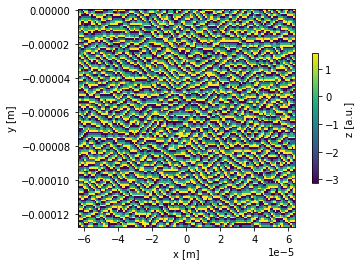

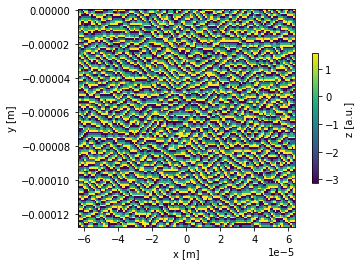

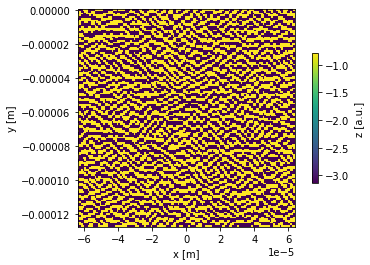

In [14]:


mask = moe.generate.create_aperture_from_array(phase_mask, pixel_size=micro, center=True, )
moe.plotting.plot_aperture(mask, )

# Discretize to same levels as original
mask.discretize(levels)
moe.plotting.plot_aperture(mask, )

# Or discretize to lower number of levels
mask.discretize(2)
moe.plotting.plot_aperture(mask, )

## Create GDS layout from calculated phase mask

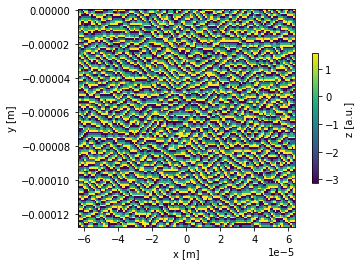

Mask has 16384 number of points distributed in 4 layers
Creating individual pixel polygons
Progress: [####################] 100.0%
[Create Polygons]
Elapsed: 0:00:00.602003
Merging layer 0 of 3 with 4103 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:04.067995
Merging layer 1 of 3 with 4129 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:04.310000
Merging layer 2 of 3 with 4073 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:04.280073
Merging layer 3 of 3 with 4079 polygons:
Progress: [####################] 100.0%
Elapsed: 0:00:04.369647
[Total time converting to GDS]
Elapsed: 0:00:17.639724


In [15]:





mask = moe.generate.create_aperture_from_array(phase_mask, pixel_size=micro, center=True, )

# Discretize to same levels as original
mask.discretize(levels)
moe.plotting.plot_aperture(mask, )


# Create GDSMask
gdsmask = moe.GDSMask(mask)

# Create layout and merge polygons together
gdsmask.create_layout(merge=True)


In [16]:
# Saving layout to GDS file

gdsmask.write_gds("holomask.gds")


Saved holomask.gds


In [17]:
gdsmask.view_layout()